# Brief exercise to understand the differences between ODE integration methods.

What we are doing here is solving the first-order ordinary differential equation (what do those words mean?) using successively more sophisticated methods.  The learning objectives are:
1. Understand the classic methods of Euler and RK ODE integration.
2. Investigate the trade-off between speed and accuracy.
3. Learn the syntax for integrating ODEs using built in ODE integrators.

### Let's start with the Euler method:

<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
/var/folders/85/vmgpb62s1p11yw79ktl94ssm0000gn/T/ipykernel_75031/1999376410.py:28: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Numerical integration of $\dot{N} = rN$')


Elapsed time: 0.9801354579394683 seconds


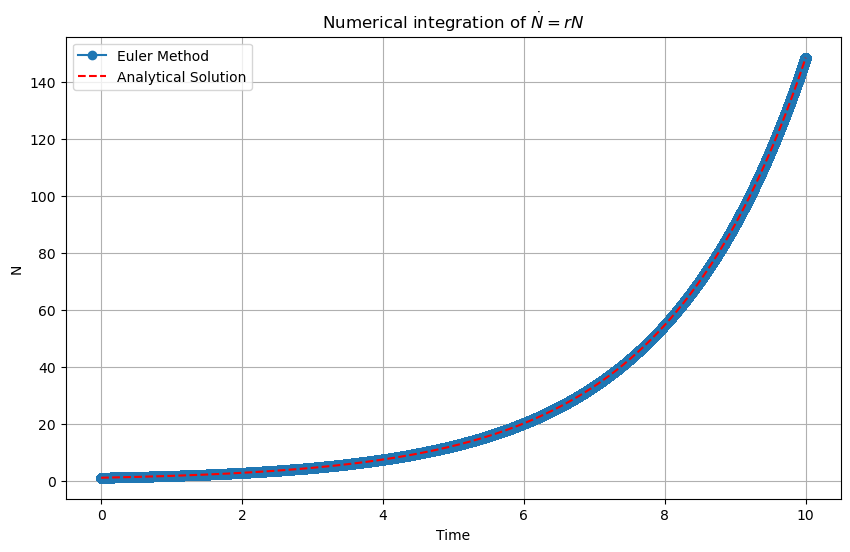

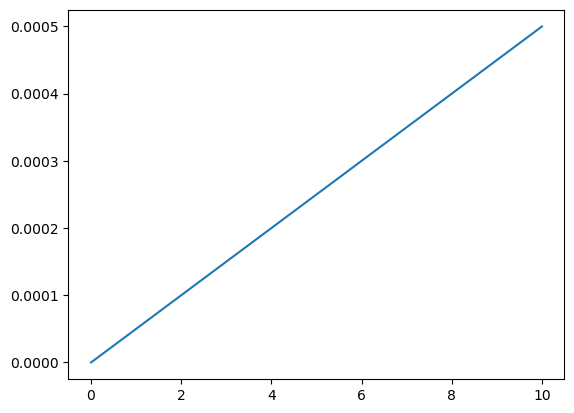

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter



r = 0.5  # growth rate
N0 = 1   # initial condition
t_final = 10  # end time
dt = 0.000004  # step size

t = np.arange(0, t_final + dt, dt)

N = np.zeros(len(t))
N[0] = N0

start = perf_counter()
for i in range(1, len(t)):
    N[i] = N[i-1] + dt * r * N[i-1]
end = perf_counter()
print(f"Elapsed time: {end - start} seconds")

N_analytical = N0 * np.exp(r * t)

plt.figure(figsize=(10, 6))
plt.plot(t, N, 'o-', label='Euler Method')
plt.plot(t, N_analytical, 'r--', label='Analytical Solution')
plt.title('Numerical integration of $\dot{N} = rN$')
plt.xlabel('Time')
plt.ylabel('N')
plt.legend()
plt.grid(True)
plt.show()

# write some code to compute the fractional error over time.
plt.plot(t, abs((N-N_analytical))*100/N_analytical)

How long does it take to do this integration?  Change the step sizes by factors of 10 and look at the timing counter to see how it changes the compute time.

### Now let's do the classic second order Runge-Kutta method.  Same problem, same parameters.

<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
/var/folders/85/vmgpb62s1p11yw79ktl94ssm0000gn/T/ipykernel_75031/820147016.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Numerical integration of $\dot{N} = rN$ using RK2')


Elapsed time: 2.3325270420173183 seconds


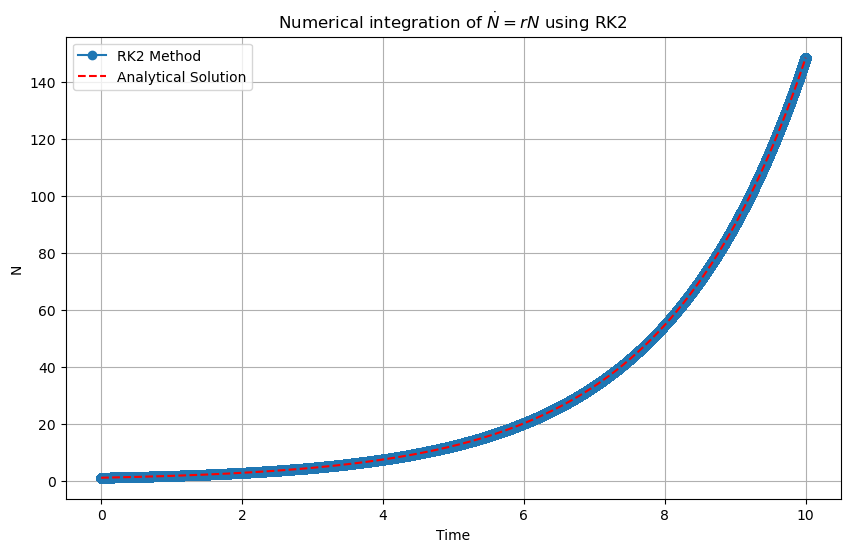

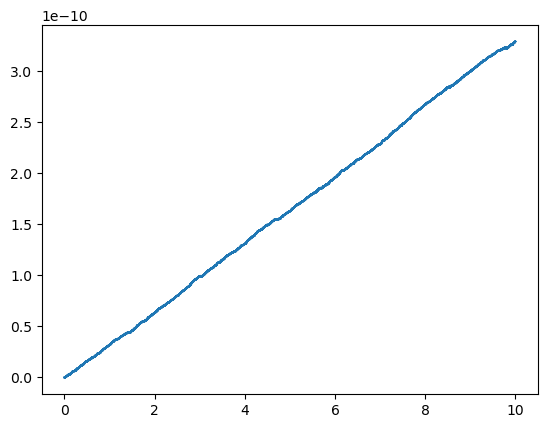

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

r = 0.5  # growth rate
N0 = 1   # initial condition
t_final = 10  # end time
dt = 0.000004  # step size

t = np.arange(0, t_final + dt, dt)


N = np.zeros(len(t))
N[0] = N0

# this. is where we do RK2 -- keep in mind the two steps
start = perf_counter()
for i in range(1, len(t)):
    # Predictor step
    N_predict = N[i-1] + dt * r * N[i-1]
    # Corrector step
    N[i] = N[i-1] + (dt/2) * (r * N[i-1] + r * N_predict)
end = perf_counter()
print(f"Elapsed time: {end - start} seconds")


N_analytical = N0 * np.exp(r * t)


plt.figure(figsize=(10, 6))
plt.plot(t, N, 'o-', label='RK2 Method')
plt.plot(t, N_analytical, 'r--', label='Analytical Solution')
plt.title('Numerical integration of $\dot{N} = rN$ using RK2')
plt.xlabel('Time')
plt.ylabel('N')
plt.legend()
plt.grid(True)
plt.show()

# again, compute the error
plt.plot(t, abs((N-N_analytical))*100/N_analytical)

*Play with the parameters above*  For equivalent specifications of the ODE integration how much more computationally expensive is the Runga-Kutta vs Euler method?  How much better is RK2 doing that Euler?

### Now let's use the protools for this problem!  Built in ODE integrator

Go look at the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
Some things for you to notice!
1. Look at how the equation for integration is specified!  This is different from what we did above which is to write approximation to $\dot{N}$ explicitly.

Elapsed time: 2.3325270420173183 seconds


<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
/var/folders/85/vmgpb62s1p11yw79ktl94ssm0000gn/T/ipykernel_75031/3213041681.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Numerical integration of $\dot{N} = rN$ using odeint')


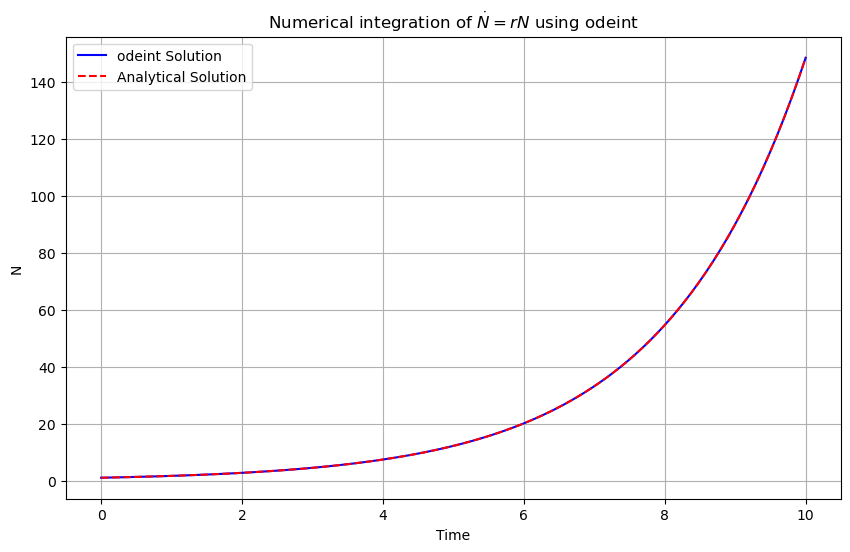

In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# note that this is required for ODE int to work, it needs 
def model(N, t, r):
    dNdt = r * N
    return dNdt

r = 0.5  # growth rate
N0 = 1   # initial condition
t_final = 10  # end time

# for this model you specify the time points not the time step!!! Very important difference!
t = np.linspace(0, t_final, 100)  
start_time = perf_counter()
solution = odeint(model, N0, t, args=(r,))
end_time = perf_counter()
print(f"Elapsed time: {end - start} seconds")

N_analytical = N0 * np.exp(r * t)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, solution, 'b-', label='odeint Solution')
plt.plot(t, N_analytical, 'r--', label='Analytical Solution')
plt.title('Numerical integration of $\dot{N} = rN$ using odeint')
plt.xlabel('Time')
plt.ylabel('N')
plt.legend()
plt.grid(True)
plt.show()
# same compute for errors, note to subtract these two vectors you will need to do np.squeeze(solution)


How do the RK2 and the ODEINT methods compare in speed and accuracy?

### When does this all really metter?

Now let's integrate an ODE that is less well behaved.  Simple, but slightly different $\dot{y} = -\lambda y$ with $y(0) = 1$ and $\lambda = 1000$.  In this case $y$ drops to zero REALLY FAST and then nothing happens.  For this one would need very small step sizes!!

How much better is ODEINT than RK2 for this method?

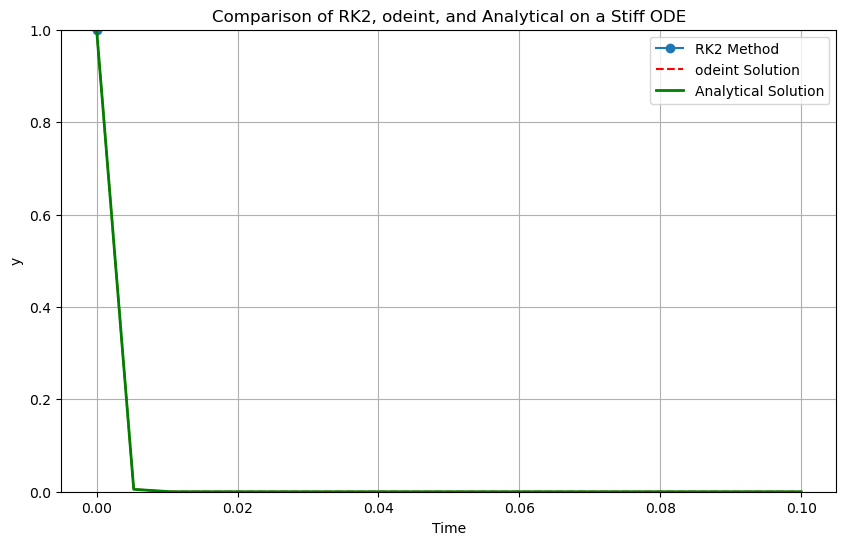

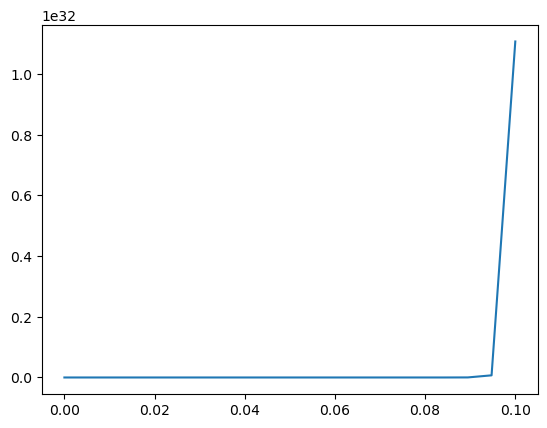

In [51]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# the function that will be called by ODEINT
def model(y, t, lam):
    dydt = -lam * y
    return dydt


lam = 1000  # Large value to make the ODE tough to deal with
y0 = 1  
t = np.linspace(0, 0.1, 20)  

# wrote a short function this time that does RK2
def rk2(f, y0, t, args=()):
    dt = t[1] - t[0]
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y_pred = y[i-1] + dt * f(y[i-1], t[i-1], *args) # this is the same step as above called the Predictor step
        y[i] = y[i-1] + 0.5 * dt * (f(y[i-1], t[i-1], *args) + f(y_pred, t[i], *args)) # this is the averaging for RK2.
    return y

y_rk2 = rk2(model, y0, t, args=(lam,))

y_odeint = odeint(model, y0, t, args=(lam,)).flatten()

y_analytical = np.exp(-lam * t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_rk2, 'o-', label='RK2 Method')
plt.plot(t, y_odeint, 'r--', label='odeint Solution')
plt.plot(t, y_analytical, 'g-', label='Analytical Solution', linewidth=2)
plt.title('Comparison of RK2, odeint, and Analytical on a Stiff ODE')
plt.ylim(0,1)
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#again plot the errors --- be aware that compute N_ - N_analytical/N_analytical will be a problem because this function goes close to zero at long times, so just compute the difference.
#
plt.plot(t, (abs((np.squeeze(y_odeint)-y_analytical))*100/y_analytical))
